In [1]:
import sys

sys.path.append('./source/')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate, stats
import matplotlib.cm as cm
from scipy import interpolate as intp
import importlib
import healpy


from source import plots
from source import prob_dists as pd
from utils import read_param_file, update_params

In [3]:
param_file = './source/n0.params'
params = read_param_file(param_file)
p = params
p

{'R_G': 220,
 'd_solar': 8.5,
 'psi': 40,
 'M_min': 0.01,
 'M_max': 10000000000.0,
 'fwimp': 1.7896346444957159,
 'mean_params': {'a': 77.4, 'b': 0.87, 'c': -0.23},
 'nside': 128,
 'area_fermi': 2000.0,
 'n': 0,
 'log_flux_min': -15,
 'log_flux_max': -5,
 'N': 1000,
 'log_k_min': -3,
 'log_k_max': 6,
 'N_k': 250000,
 'psh_log_f_min': -6,
 'psh_log_f_max': -3.0,
 'N_psh': 1000,
 'omega_pixel': 6.391586616190171e-05,
 'exposure': 5570.423008216337,
 'iso_flux_bg': 0.0008939106670451649,
 'gal_flux_bg_file': './output/gal_flux_bg.npy',
 'bg': 1,
 'beg': 1,
 'beta': 1.9}

In [4]:
pltparams = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(pltparams)

colors = ['xkcd:pig pink', 'xkcd:windows blue']
n_labels = [r"$s$-wave ($n=0$)", r"Som. enh. ($n=-1$)"]

psi = 100

beta is 1.9
shift is 1.501796121931284e-13
beta is 1.9
Fluxes shifted by 0.009890693191911824 1.5183931932691907e-11
beta is 1.57
shift is 2.3828039177780997e-13
beta is 1.57
Fluxes shifted by 0.01110058999381992 2.1465561011664143e-11


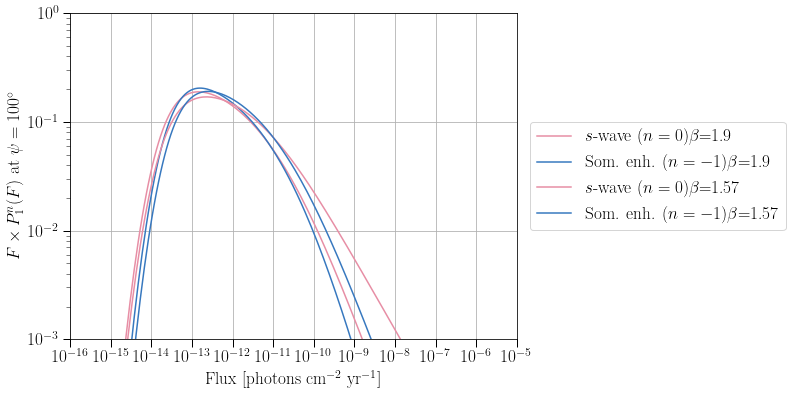

In [5]:
outfile = "./output/plots/p1_ssom.pdf"
fig, ax = plots.p1_plot(p, n_list=[0, -1], psi=psi, outfile=outfile, color=colors, shift=True, betas=[1.9, 1.57])
# ax.set_xlim(left=1e-16, right=1e-5)
# ax.set_ylim(bottom=1e-3, top=1)
# fig.savefig(outfile)

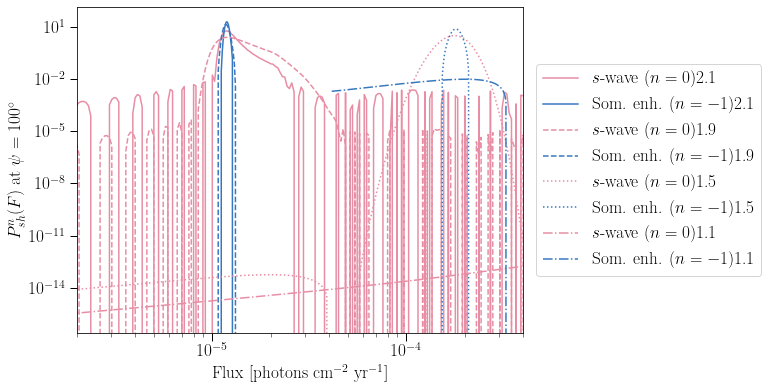

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
lss = iter(['-', '--', ':', '-.'])

for beta in [2.1, 1.9, 1.5, 1.1]:
    with np.load(f'./output/n0_pshfunc_beta{int(beta*10):d}.npz') as f:
        psis = f['psi']
        fluxes = f['flux']
        psh2d = f['psh']

    pshfunc2d = intp.interp2d(psis, fluxes, np.nan_to_num(psh2d), bounds_error=False, fill_value=0)
    sfluxes = fluxes[:]
    spsh = fluxes[psh2d[0].argmax()]

    with np.load(f'./output/n-1_pshfunc_beta{int(beta*10):d}.npz') as f:
        psis = f['psi']
        fluxes = f['flux']
        psh2d = f['psh']

    psh2d[psh2d < 0] = 0

    sompshfunc2d = intp.interp2d(psis, fluxes, np.nan_to_num(psh2d), bounds_error=False, fill_value=0)
    somfluxes = fluxes[:]


    shift_som = somfluxes[(somfluxes*sompshfunc2d(psi, somfluxes).T).argmax()] / sfluxes[(sfluxes*pshfunc2d(psi, sfluxes).T).argmax()]
    # psh2d *= shift_som
    # fluxes /= shift_som

    ls = next(lss)
    ax.plot(sfluxes, sfluxes * pshfunc2d(psi, sfluxes).flatten(), label=n_labels[0]+str(beta), color=colors[0], ls=ls)
    ax.plot(somfluxes / shift_som, somfluxes * sompshfunc2d(psi, somfluxes).flatten(), label=n_labels[-1]+str(beta), color=colors[-1], ls=ls)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'Flux [photons cm$^{-2}$ yr$^{-1}$]')
    ax.set_ylabel(rf'$P^n_{{sh}}(F)$ at $\psi={psi}^\circ$')

    ax.set_xlim(left=2e-6, right=4e-4)
#     ax.set_ylim(bottom=1e-4, top=100)
    ax.grid()
    lgd = ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))

fig.savefig('./output/plots/psh_ssom.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

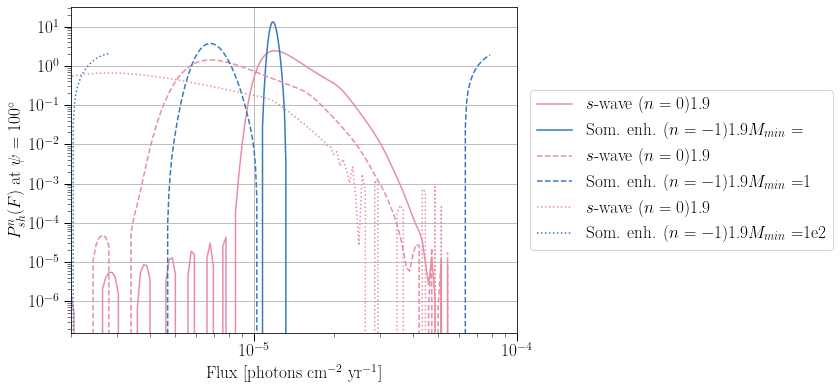

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
lss = iter(['-', '--', ':', '-.'])

beta = 1.9
for mmin in ['', '_Mmin1', '_Mmin1e2']:
    with np.load(f'./output/n0_pshfunc_beta19' + mmin + '.npz') as f:
        psis = f['psi']
        fluxes = f['flux']
        psh2d = f['psh']

    pshfunc2d = intp.interp2d(psis, fluxes, np.nan_to_num(psh2d), bounds_error=False, fill_value=0)
    sfluxes = fluxes[10:-105]
    spsh = fluxes[psh2d[0].argmax()]

    with np.load(f'./output/n-1_pshfunc_beta19' + mmin + '.npz') as f:
        psis = f['psi']
        fluxes = f['flux']
        psh2d = f['psh']

    psh2d[psh2d < 0] = 0

#     print(psh2d)
    sompshfunc2d = intp.interp2d(psis, fluxes, np.nan_to_num(psh2d), bounds_error=False, fill_value=0)
    somfluxes = fluxes[5:]


    shift_som = somfluxes[(somfluxes*sompshfunc2d(psi, somfluxes).T).argmax()] / sfluxes[(sfluxes*pshfunc2d(psi, sfluxes).T).argmax()]
    # psh2d *= shift_som
    # fluxes /= shift_som

    ls = next(lss)
    ax.plot(sfluxes, sfluxes * pshfunc2d(psi, sfluxes).flatten(), label=n_labels[0]+str(beta), color=colors[0], ls=ls)
    ax.plot(somfluxes / shift_som, somfluxes * sompshfunc2d(psi, somfluxes).flatten(), label=n_labels[-1]+str(beta) + '$M_{min}=$' + mmin.lstrip('_Mmin'), color=colors[-1], ls=ls)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'Flux [photons cm$^{-2}$ yr$^{-1}$]')
    ax.set_ylabel(rf'$P^n_{{sh}}(F)$ at $\psi={psi}^\circ$')

    ax.set_xlim(left=2e-6, right=1e-4)
#     ax.set_ylim(bottom=1e-4, top=100)
    ax.grid()
    lgd = ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))

fig.savefig('./output/plots/psh_ssom.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

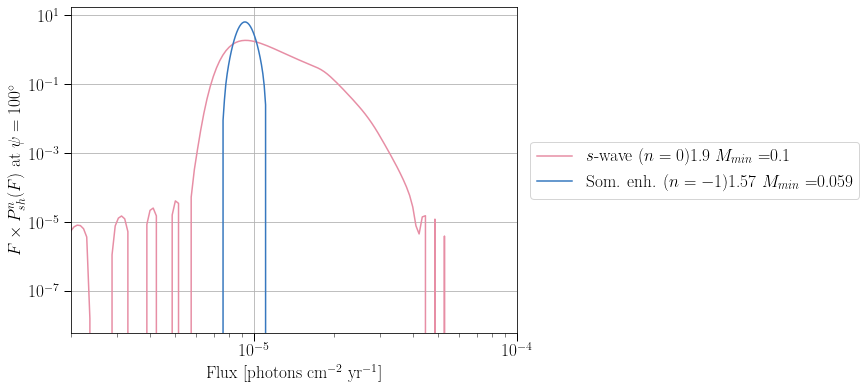

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
lss = iter(['-', '--', ':', '-.'])

files, mmins, betas = ['./output/n0_pshfunc_beta19_Mmin1e-1.npz', './output/n-1_pshfunc_beta19_Mmin59e-3.npz'], [1e-1, 5.9e-2], [1.9, 1.57]
with np.load(files[0]) as f:
    psis = f['psi']
    fluxes = f['flux']
    psh2d = f['psh']

pshfunc2d = intp.interp2d(psis, fluxes, np.nan_to_num(psh2d), bounds_error=False, fill_value=0)
sfluxes = fluxes[10:-105]
spsh = fluxes[psh2d[0].argmax()]

with np.load(files[1]) as f:
    psis = f['psi']
    fluxes = f['flux']
    psh2d = f['psh']

psh2d[psh2d < 0] = 0

#     print(psh2d)
sompshfunc2d = intp.interp2d(psis, fluxes, np.nan_to_num(psh2d), bounds_error=False, fill_value=0)
somfluxes = fluxes[5:]


shift_som = somfluxes[(somfluxes*sompshfunc2d(psi, somfluxes).T).argmax()] / sfluxes[(sfluxes*pshfunc2d(psi, sfluxes).T).argmax()]
# psh2d *= shift_som
# fluxes /= shift_som

ls = next(lss)
ax.plot(sfluxes, sfluxes * pshfunc2d(psi, sfluxes).flatten(), label=n_labels[0]+str(betas[0]) + '  $M_{min}=$' + str(mmins[0]), color=colors[0], ls=ls)
ax.plot(somfluxes / shift_som, somfluxes * sompshfunc2d(psi, somfluxes).flatten(), label=n_labels[-1]+str(betas[1]) + ' $M_{min}=$' + str(mmins[1]), color=colors[-1], ls=ls)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'Flux [photons cm$^{-2}$ yr$^{-1}$]')
ax.set_ylabel(rf'$F \times P^n_{{sh}}(F)$ at $\psi={psi}^\circ$')

ax.set_xlim(left=2e-6, right=1e-4)
#     ax.set_ylim(bottom=1e-4, top=100)
ax.grid()
lgd = ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))

fig.savefig('./output/plots/psh_ssom.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

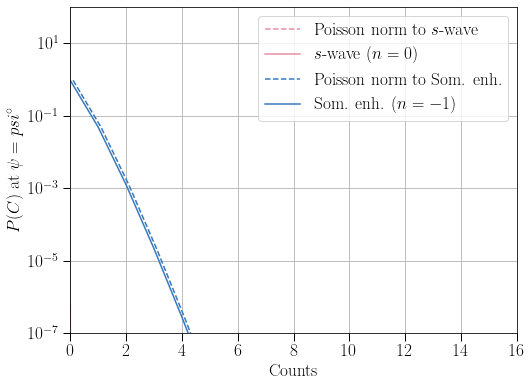

In [9]:
from scipy.stats import poisson

counts = np.arange(0, 18)
exposure = p['exposure']

pp = poisson.pmf(counts, exposure*np.trapz(fluxes * pshfunc2d(psi, fluxes).flatten(), fluxes))

pcvals = np.trapz(pshfunc2d(psi, fluxes).flatten() * poisson.pmf(counts[:, np.newaxis], exposure * fluxes), fluxes, axis=-1)


ppsom = poisson.pmf(counts, exposure*np.trapz(somfluxes * sompshfunc2d(psi, somfluxes).flatten(), somfluxes / shift_som))

pcsomvals = np.trapz(sompshfunc2d(psi, somfluxes).flatten() * poisson.pmf(counts[:, np.newaxis], exposure / shift_som * somfluxes), somfluxes, axis=-1)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(counts-0.1, pp, '--', label=r'Poisson norm to $s$-wave', color=colors[0])
ax.plot(counts, pcvals, label=n_labels[0], color=colors[0])
ax.plot(counts+0.1, ppsom, '--', label=r'Poisson norm to Som. enh.', color=colors[-1])
ax.plot(counts, pcsomvals, label=n_labels[-1], color=colors[-1])

ax.set_yscale('log')
ax.set_ylabel(rf'$P(C)$ at $\psi={{psi}}^\circ$')
ax.set_xlabel('Counts')
ax.grid()
ax.legend(loc='upper right')

ax.set_ylim(bottom=1e-7, top=1e2)
ax.set_xlim(left=0, right=16)

fig.savefig('./output/plots/pc_ssom.pdf')

/usr/local/lib/python3.8/site-packages/healpy/projaxes.py:200: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(


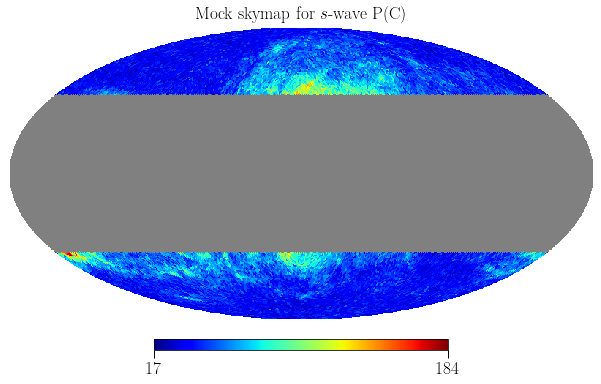

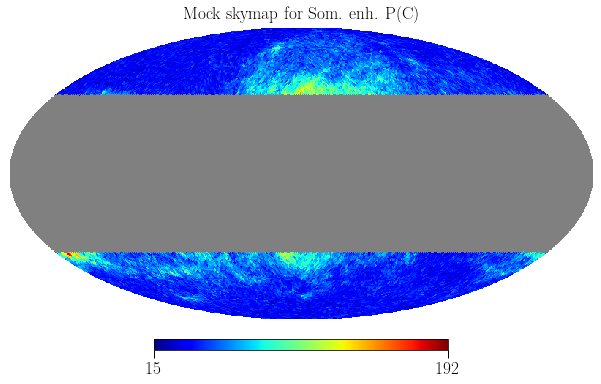

In [10]:
# fiducial fermi exposure and fwimp = phipp swave
s_map = './output/plots/n0_skymap_59674.npy'
som_map = './output/plots/n-1_skymap_81209.npy'

nreduce = 64

pixel_counts_pc = np.load(s_map)
healpy.mollview(healpy.pixelfunc.ud_grade(healpy.pixelfunc.ma(pixel_counts_pc), nreduce, pess=True, power=-2), cmap=cm.jet, title=r"Mock skymap for $s$-wave P(C)")

pixel_counts_pc = np.load(som_map)
healpy.mollview(healpy.pixelfunc.ud_grade(healpy.pixelfunc.ma(pixel_counts_pc), nreduce, pess=True, power=-2), cmap=cm.jet, title=r"Mock skymap for Som. enh. P(C)")

In [11]:
pd.mu(100, beta=2.1), pd.mu(100, beta=1.9), pd.mu(100, beta=1.5), pd.mu(100, beta=1.1)

beta is 2.1
beta is 1.9
beta is 1.5
beta is 1.1


(array([6843497.04944022]),
 array([3308976.67763022]),
 array([933491.4401403]),
 array([686696.75908775]))

In [12]:
n = 0
beta = 1.9
alpha = 0.87 + 0.31 * n
gamma = (1 - beta)/alpha - 1
alpha, beta, gamma

(0.87, 1.9, -2.0344827586206895)

In [13]:
n = -1
alpha = 0.87 + 0.31 * n
# gamma = (1 - beta)/alpha - 1
beta = 1 - (gamma + 1) * alpha
alpha, beta, gamma

(0.56, 1.579310344827586, -2.0344827586206895)

In [14]:
pd.mu(100, beta=1.9, M_min=.1), pd.mu(100, beta=beta, M_min=5.9e-2)

beta is 1.9
beta is 1.579310344827586


(array([414251.36740553]), array([414682.53804473]))